<a href="https://colab.research.google.com/github/LuisaBeccar/Clases-de-CoderHouse-Data-Science/blob/main/ProyectoDS_Parte1_LuisaBeccarVarela.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TP FINAL - CIENCIA DE DATOS 61140 - CODERCHOUSE 2024**

LUISA BECCAR VARELA

**Sobrevida de pacientes con Cancer de mama a 5 años del diagnostico**

<br>


**OBJETIVOS**: predecir si una mujer de entre 30 y 69 años de edad con cancer de mama estará viva a 60 meses (5 años) del diagnosico, considerando las caracteristicas del tumor y de la paciente.

<br>

# Base de datos
<br>
De: https://www.kaggle.com/datasets/reihanenamdari/breast-cancer

<br>

Segun el repositorio de keagle, el dataset se obtuvo de la actualizacion del programa SEER del National Cancer Institute en noviembre 2017, que da informacion de estadisticas de pacientes con cancer.
<br>
Se trata de diagnosticos de mujeres con carcinoma ductal infiltrante y carcinoma lobular de mama, recolectados entre el 2006 y 2010. Se excluyeron registros de pacientes con tamaño tumoral desconocido, sin ganglios regionales examinados, sin gangilios regionales positivos y cuyos meses de supervivencia eran menores de uno.

<br>

# Descripcion

Cuando se estudia un cancer de mama, se usan distintas clasificaciones que describen la gravedad y malignidad del tumor:
- El tamaño y la cantidad de ganglios regionales positivos se usan para determinar el T y el N respectivamente, y luego estos parametros junto con el M (aqui "A Stage": si hay metastasis a distancia: diseminado) determinan el 6th Stage: estadio clinico.
- Luego de una biopsia, se puede analizar las celulas que componen el tumor y segun sus caracteristicas de determina el grado de differenciacion. Sea bien, moderado, pobremente diferenciado o indiferenciado/anaplasico. Más grave cuanto menos diferenciado sea.
- La cantidad de ganglios linfaticos afectados hala de la diseminacion del tumor, por lo cual más es peor.
- Determinar si tiene o no receptores hormonales de Estrogenos y Progesagenos cobra importancia para el tratamiento de eleccion, ya que existen farmacos especificos dirigidos a estos receptores, ademas de la quimio y radio terapia.
- La raza y la edad podrian influir en el tipo de cancer que desarrolla la paciente
- No creemos que el estado civil tenga influencia en la enfrmedad.

# Hipotesis
Considerando lo expuesto previamente, para determinar si una paciente estara viva o no a 5 años del diagnostico (60 meses), se podrian generar las siguientes hipotesis:

  - Sujetos con marcadores hormonales positivos ya sea de progesterona o estrogenos (Estrogen Status, Progesterone Status) tiene mayor sobrevida (Survival Months) debido a que hay trataminetos especificos dirigidos a estos tipos de tumores.
    - ER PR +/-: Meses de sobrevida, Status (Dead o Alive).

  - Tamaños tumorales más grandes se asocian a peor grado de diferenciacion (Differentiate) y estadio clinico (6th Stage).
    - Histograma tamaños tumorales
    - Boxplot tamaños tumorales segun Differentiate y segun 6th Stage

  - Las pacientes que falleccieron (Status: Dead) tenian mas ganglios linfaticos positivos (Regional Node Positve)

Atributos de la "Breast Cancer":

- Age: edad de los sujetos: 30-69 años <br>
- Race: raza de los sujetos: White, Black, Other (American Indian/AK Native, Asian/Pasific Islander) <br>
- Marital Status: Married (casado), Single (soltero), Divorced (divorciado), Widowed (enviudado), Separated (separado) <br>
- T Stage: clasificacion tumoral segun tamaño de la masa tumoral: T1, T2, T3, T4 *<br>
- N Stage: clasificacion tumoral segun nodulos linfaticos afectados por tumor: N1, N2, N3 * <br>
- 6th Stage: clasificacion en estadios clinicos segun el T, N y M: IIA, IIB, IIIA, IIIB, IIIC * <br>
- differrentiate: grado de diferenciacion de las celulas del tumor: Poorly differentiated, Moderately differentiated, Well differentiated, Undifferentiated. Luego le corregí el nombre de la variable a "Differentiate"
- Grade: grado del tumor: 1, 2, 3, 4 o anaplasico * <br>
- A Stage: estadio de diseminacion: Regional o Distant (diseminado) con metastasis a distancia. <br>
- Tumor Size: en milimetros (de 1  a 140mm) <br>
- Estrogen Status: si tiene receptores hormonaes estrogenicos o no: Positive o Negative <br>
- Progesterone Status: si tiene receptores hormonaes de progesterona o no: Positive o Negative <br>
- Regional Node Examined: numero de nodulos linfaticos regionales examinados (1-61 nodulos) <br>
- Reginol Node Positive: cantidad de ganglios regionales examinados que resultaron positivos a malignidad (1 a 46) - Luego le corregí el nombre a "Regional Node Positive" <br>
- Survival Months: meses de sobrevida del suejeto (1 a 107)  <br>
- Status: estado actual: Alive (vivo) o Dead (murió) <br>
<br>

<br>
Luego creare mi **variable objetivo: "Sobrevida"** para predecir si la paciente vivio o no 5 años desde el diagnostico : si "Survival Months" >= 60 Sobrevida = True.<br>


In [ ]:
# importo librerias

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.impute import SimpleImputer


In [ ]:
# subo la base de datos, que guarde en mi github

url = 'https://raw.githubusercontent.com/LuisaBeccar/Clases-de-CoderHouse-Data-Science/main/Breast_Cancer.csv'
#df = pd.read_csv(url, skipinitialspace=True) # funcion para quitarle si hubiera espacios en blanco adelante de cada str
df = pd.read_csv(url)
df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


In [ ]:
# investigando la base de datos

"""
print(df.columns)
print("--------------------------------------")
print(df.dtypes)
print("--------------------------------------")
print(df.index)
print("--------------------------------------")
print(df.shape)
print("--------------------------------------")
"""
print(df.info())
print("--------------------------------------")
print(df.describe().round())
print("--------------------------------------")
print(df.describe(include=object))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [ ]:
# Creacion de mi variable objetivo, y edicion de otras features

# Agrego columna Sobrevida si "survival months" > 60 meses (5 años). Esta sera mi variable objetivo
Sobrevida = []
for i in df["Survival Months"]: #para cada elemento de "survival months", evalua si es mayor a 60 meses (5 años) (TRUE) y el resultado booleano (TRUE O FALSE) agregalo a la lista "Sobrevida"
    Sobrevida.append(i >= 60)
Sobrevida = pd.Series(Sobrevida)
df["Sobrevida"] = Sobrevida

# modificar el nombre de Reginol Node Positive por Regional Node Positive
df.rename(columns={'Reginol Node Positive':'Regional Node Positive'}, inplace=True)

# modificar el nombre de "T Stage " por "T Stage" sin espacio final. La funcion utilizada mas arroba no cambia los numbres de las columnas que tengan este problema
df.rename(columns={'T Stage ':'T Stage'}, inplace=True)

# modificar el nombre de "differentiate" por "Differentiate" sin espacio final
df.rename(columns={'differentiate':'Differentiate'}, inplace=True)

Algunas consideraciones:
<br>
La base tiene 4024 observacions y 16 atributos (17 con la de "Sobrevivientes" que agregue yo), y no tiene datos faltantes.
<br>

Acerca de los tipos de variables, voy a querer considerarlas de la siguinete manera: <br>
- Atributos cuantitativos:
    - Continuos: Age, Tumor Size,  Survival Months
    - Discretos: Regional Node Examined, Regional Node Positive,
- Atributos categoricos:
    - Nominales: Race, Marital Status, A State, Estrogen Status, Progesterone Status, Status, Sobrevida, A Stage.
    - Ordinales: N Stage, 6th Stage, Differentiate, Grade

In [ ]:
# Encontre valores que tenian un espacio invisible al final que dificultava el trabajo con datos,
""" para solucionar esto encontre este metodo que crea una funcion para sacar espacion pre y post
strings de objetos, a la cual se le pasa el dataframe como unico parametro """

def whitespace_remover(miDataFrame): # defino la funcion
    for i in miDataFrame.columns:  # para cada columna
        if miDataFrame[i].dtype == 'object': # chequiar que sea tipo objeto
            miDataFrame[i] = miDataFrame[i].map(str.strip) # aplicarle la fx strip asl string
        else: # si no es objeto el dato pasa al siguiente
            pass

# applying whitespace_remover function on dataframe
whitespace_remover(df)


# LIMPIEZA DE DATOS:
- Datos nulos
- Correccion de errores

In [ ]:
# para esta linea de analisis hare una copia del df que venia trabajando y la llamares dfR

dfR = pd.DataFrame(df)

print(dfR.info())
print("--------------------------------------")
print(dfR.describe())
print("--------------------------------------")
print(dfR.describe(include=object))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   Differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Regional Node Positive  4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [ ]:
# corroboro que no hay datos faltantes de otra manera distinta a info()

print("Con isnull y sum:")
print(dfR.isnull().sum())
print("-----------------")
print("Con isna y any:")
print(dfR.isna().any())

Con isnull y sum:
Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
Differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Regional Node Positive    0
Survival Months           0
Status                    0
Sobrevida                 0
dtype: int64
-----------------
Con isna y any:
Age                       False
Race                      False
Marital Status            False
T Stage                   False
N Stage                   False
6th Stage                 False
Differentiate             False
Grade                     False
A Stage                   False
Tumor Size                False
Estrogen Status           False
Progesterone Status       False
Regional Node Examined    False
Regional Node Positive    False
Survival Mo

Para fines didacticos y usar funciones practicas para limpieza de datos...

A) Digamos que al analizar los "Marital Status" de las pacientes consideramos que en vez de saber si es Divorciada, Separada o Viuda, solo queremos que diga "Married" o "Single", incluyendo en este Single todas las opciones mencionadas previamente. Entonces, queremos trasnformar "Divorced", "Widowed" y "Separated" en "Single",haciendo un camino largo: <br>
 1) Reemplazaré los "Divorced", "Widowed" y "Separated" por Nans <br>
 2) y luego esos Nans por "Single". <br>
 3) Si decidiera no analizar esta variable por no considerarla pertinente para la supervivencia de las pacientes, la eliminaria.
 <br>

B) Además hare tranformaciones en las pacientes con meses de supervivencia menores o iguales a 3 como si estos datos fueran errores en la data entry: <br>
 1) primero los reemmplazare por nan <br>
 2) luego esos nans por ceros, y esos ceros a type int.
 <br>
 3) luego usare el simpleimputer para reemplazar valores faltantes, en este caso usando como 'strategy' la moda y la llamaré *dfRmoda*.<br>
 4) Disconforme con esta manera de tratar los datos¨, terminare por eliminar de la base las filas con 0 en Survival Months que quedaron en *dfR0* en el punto B2

## A

In [ ]:
print(dfR["Marital Status"].value_counts())

# A1) reemplazo Separada, Viudas y Divorciadas por Nans (sabiendo previamente que no tenia datos Nans en mi base)
dfR['Marital Status']= dfR['Marital Status'].replace(["Separated","Widowed","Divorced"], np.nan)

# veo cuantos Nans tengo ahora: se que esos nans son exclusivamente los que acabo de crear
print(dfR['Marital Status'].isnull().sum())


Marital Status
Married      2643
Single        615
Divorced      486
Widowed       235
Separated      45
Name: count, dtype: int64
766


In [ ]:
# A2) Reemplazo Nans por "Single"

dfR['Marital Status'].fillna("Single", inplace=True)

print(dfR['Marital Status'].isnull().sum())
print((dfR['Marital Status']=="Single").sum())

# corroboro que ahora tengo 1382 Separated y quedaron mis 2643 Married suman el total de mis observaciones
print((dfR['Marital Status']=="Single").sum() + (dfR['Marital Status']=="Married").sum()) #4024

0
1381
4024


In [ ]:
# A3) eliminar columna de dataset
dfR = dfR.drop(columns="Marital Status", axis=1)


In [ ]:
dfR

,Age,Race,T Stage,N Stage,6th Stage,Differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months,Status,Sobrevida
0,68,White,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive,True
1,50,White,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive,True
2,58,White,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive,True
3,58,White,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive,True
4,47,White,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive,False
4020,56,White,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive,True
4021,68,White,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive,True
4022,58,Black,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive,True


## B

In [ ]:
# B1) transfromar Survival Months menores de 3 en nan. Nan es float

print((dfR['Survival Months']<= 3).sum()) #  8 registros con Survival Months menor o igual a 3 meses

dfR['Survival Months']= dfR['Survival Months'].where(dfR["Survival Months"] > 3, np.nan)
print(dfR['Survival Months'].isnull().sum()) # 8

print(dfR.isnull().sum())
print(dfR.isna().any())

# queda dfR con 8 nulls en survival months

8
8
Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
Differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Regional Node Positive    0
Survival Months           8
Status                    0
Sobrevida                 0
dtype: int64
Age                       False
Race                      False
Marital Status            False
T Stage                   False
N Stage                   False
6th Stage                 False
Differentiate             False
Grade                     False
A Stage                   False
Tumor Size                False
Estrogen Status           False
Progesterone Status       False
Regional Node Examined    False
Regional Node Positive    False
Survival Months            True
Status                    F

In [ ]:
# B2)
# Defino una nueva base dfR0 que quedara con ceros en el lugar de esos "Survival Months" menores a 3 que habian sido reemplazados por nanas
dfR0 = dfR
#reemplazar nanspor ceros y cambiar tipo de float a int
dfR0['Survival Months'] = dfR['Survival Months'].fillna(0)

dfR0['Survival Months'] = dfR['Survival Months'].astype(int)
dfR0.dtypes
# quedaron 8 ceros en lugar de esos 8 nans, y la variable es tipo int, sin datos nulos
print(dfR0.isnull().sum())
print(dfR0.isna().any())


Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
Differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Regional Node Positive    0
Survival Months           0
Status                    0
Sobrevida                 0
dtype: int64
Age                       False
Race                      False
Marital Status            False
T Stage                   False
N Stage                   False
6th Stage                 False
Differentiate             False
Grade                     False
A Stage                   False
Tumor Size                False
Estrogen Status           False
Progesterone Status       False
Regional Node Examined    False
Regional Node Positive    False
Survival Months           False
Status                    False

In [ ]:
# probando dropear la filas con cero en Survival Months

df0 = dfR.drop(dfR0[(dfR0["Survival Months"] == 0)].index)
df0.shape

(4016, 17)

In [ ]:
# B2) Scikit-learn  para reemplazar estos Survival Months nan por la moda

dfRmoda = dfR # creo una nueva base dfRmoda para que no me pise a dfR

print(dfRmoda["Survival Months"].mode()) # la moda 69
print(dfRmoda["Survival Months"].value_counts()) # la moda es 69, se repite 81 veces



0    69
Name: Survival Months, dtype: int64
Survival Months
69     81
102    73
56     73
63     73
98     72
       ..
19      5
32      5
26      5
7       5
11      4
Name: count, Length: 105, dtype: int64


In [ ]:
print("-------------")   ### NO SALIOO, una vez si y despues no lo hizo mas

from sklearn.impute import SimpleImputer

valores = dfRmoda["Survival Months"].values.reshape(-1,1) # columna en array 2D
# definir el imputador
imputador = SimpleImputer(missing_values = np.nan, strategy="most_frequent" ) # probe con strategy="constant", fill_value=69 (a mano le pongo la moda que calcule antes,  y tampoco salio)
# transformar el array
SMimputado = imputador.fit_transform(valores)
dfRmoda["Survival Months"] = SMimputado

dfRmoda = dfRmoda.rename(columns={0:'Age', 1:'Race', 2:'Marital Status', 3:'T Stage',
                                   4:'N Stage', 5:'6th Stage', 6:'Differentiate', 7:'Grade',
                                   8:'A Stage', 9:'Tumor Size', 10:'Estrogen Status',
                                   11:'Progesterone Status', 12:'Regional Node Examined',
                                   13:'Reginol Node Positive', 14:'Survival Months',
                                   15:'Status', 16:'Sobrevida'})

print(dfRmoda["Survival Months"].value_counts())


-------------
Survival Months
69     81
102    73
56     73
63     73
98     72
       ..
19      5
32      5
26      5
7       5
11      4
Name: count, Length: 105, dtype: int64
Se cambiaron los ceros por el valor de la moda:69 y ahora hay 89 veces el valor 69 meses de supervivencia


Lo que deberia suceder es que se cambien los ceros por el valor de la moda:69 y ahora haya 89 veces el valor 69 meses de supervivencia.
(# Pero no logro decifrar por que no anda)

In [ ]:
# B3) Eliminar filas de Survival Months = Nan de B1 dfR  !!! NO ME LOS DROPEAAA

dfR_na = dfR.dropna().reset_index(drop=True)
dfR_na


,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months,Status,Sobrevida
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive,True
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive,True
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive,True
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive,True
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive,False
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive,True
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive,True
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive,True


Con este metodo deberia eliminarme las filas  y corregir el indice, asi deberia quedar un dataframe de 4016 registros, pues sabemos que habiamos transformado 8 valores a nans




In [ ]:
# B3 probando otro metodo: para eliminar / filtrar filas

dfR_filtrado = dfR[dfR["Survival Months"] >3]
print(dfR_filtrado.shape)
dfR_filtrado_reindexado = dfR_filtrado.reindex(index=None, columns=None, axis=0)
dfR_filtrado_reindexado

(4016, 17)


,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months,Status,Sobrevida
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive,True
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive,True
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive,True
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive,True
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive,False
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive,True
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive,True
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive,True


Por este metodo si veo que me elimina las filas, pero no logre la reindexacion.

# VISUALIZACIONES


## Tumor Size
<br>
Hipotesis:
<br>

Tamaños tumorales más grandes se asocian a peor grado de diferenciacion (Differentiate) y estadio clinico (6th Stage).
<br>

Histograma tamaños tumorales
Boxplot tamaños tumorales y segun Differentiate, 6th Stage y otras variables.

Text(0, 0.5, 'Cantidad')

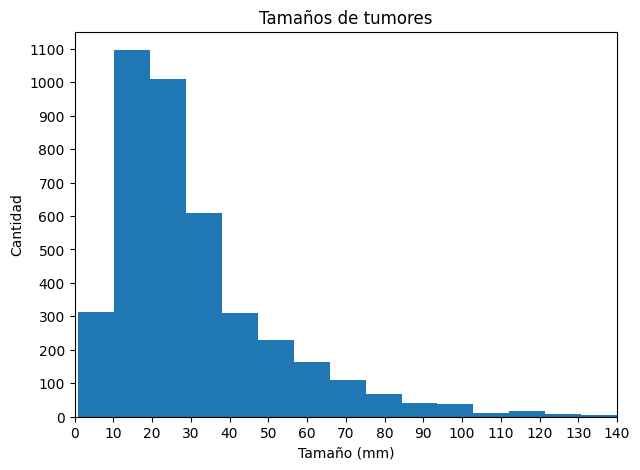

In [ ]:
# Histograma matplotlib para ver frecuencia de los tamaños tumorales

# Totales
size = np.array(df['Tumor Size'])
fig, ax = plt.subplots(figsize=(7,5))
ax.hist(size, bins=15)
ax.set_title('Tamaños de tumores')
ax.set_xlim([0,140])
ax.set_xticks(range(0, 141, 10))
ax.set_xlabel('Tamaño (mm)')
ax.set_yticks(range(0, 1200, 100))
ax.set_ylabel('Cantidad')


In [ ]:
# Estadisticos de de tamaños tumorales

print(df['Tumor Size'].std().round(1))
print(df['Tumor Size'].mean().round(1))
print(df['Tumor Size'].median().round(1))

coef_var = df["Tumor Size"].std() / df['Tumor Size'].mean() *100
print(coef_var)

print(df["Tumor Size"].describe()) # otra forma sensilla de ver los estadisticos de mi variable


21.1
30.5
25.0
69.30476168824006
count    4024.000000
mean       30.473658
std        21.119696
min         1.000000
25%        16.000000
50%        25.000000
75%        38.000000
max       140.000000
Name: Tumor Size, dtype: float64


La variable "Tumor Size" tiene una distribucion asimetrica a la derecha,
donde la mediana(25mm) es menor que la media (30.5mm).
El coeficiente de variacion de 69.3 me dice que es muy heterogenea mi muestra en cuanto a tamaños tumorales ya que es un valor mayor al 30%.

In [ ]:
# Histogramas subplots COLS TAMAÑOS TUMORALES SEGUN T STAGE
bin_width = 10
bin_range = range(1, 150, bin_width)
fig, axs = plt.subplots (nrows=2, ncols=2, figsize=(8, 6)) # si comparten ejes queda muy chiquito el T4 porque son pocos casos

axs[0,0].hist(df[df["T Stage"]=="T1"]["Tumor Size"], bins=bin_range)
axs[0,0].set_title("T1")

axs[0,1].hist(df[df["T Stage"]=="T2"]["Tumor Size"], bins=bin_range)
axs[0,1].set_title("T2")

axs[1,0].hist(df[df["T Stage"]=="T3"]["Tumor Size"], bins=bin_range)
axs[1,0].set_title("T3")

axs[1,1].hist(df[df["T Stage"]=="T4"]["Tumor Size"], bins=bin_range)
axs[1,1].set_title("T4")

fig.suptitle("Tamaño tumoral en mm segun T Stage")
plt.show()

# no comparten eje y porque las cantidades de cada uno son muy distintas



En este subplot de histogramas se ve como cada categoria de T tiene sus tamaños tumorales definidos:
- T1 hasta 20mm (2cm),
- T2 entre 20 y 50 mm,
- T3 mas de 50mm y
- T4 cualquier tamaño (pero infiltra otros tejidos adyacentes).


<ipython-input-206-4bd092d86850>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df, y="Tumor Size", palette="pastel", width=0.2, fliersize=2).set(title="Boxplot Tumor Size", ylabel="mm")


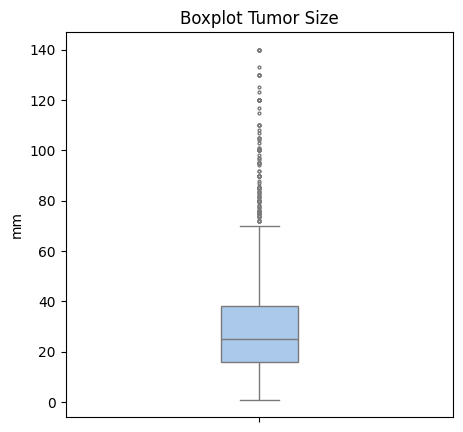

In [ ]:
# Boxplot SNS Tamaños tumorales

plt.figure(figsize=(5,5))
sns.boxplot(df, y="Tumor Size", palette="pastel", width=0.2, fliersize=2).set(title="Boxplot Tumor Size", ylabel="mm")

plt.show()

In [ ]:
# Obtengo el resto de los estadisticos de la funcion describe y de mi boxplot

q1 = df["Tumor Size"].quantile(0.25).round(1)
q2 = df["Tumor Size"].quantile(0.50).round(1)
q3 = df["Tumor Size"].quantile(0.75).round(1)
maximo = df["Tumor Size"].max()
minimo = df["Tumor Size"].min()

print(q1, q2, q3, maximo, minimo)

# Obtener los valores de outliers superiores e inferiores)

valor_max_ts = df["Tumor Size"].quantile(0.75) + 1.5*(df["Tumor Size"].quantile(0.75)-df["Tumor Size"].quantile(0.25))
valor_min_ts = df["Tumor Size"].quantile(0.25) - 1.5*(df["Tumor Size"].quantile(0.75)-df["Tumor Size"].quantile(0.25))

print(valor_max_ts, valor_min_ts)


16.0 25.0 38.0 140 1
71.0 -17.0


Aqui el outlier menor de negativo (-17).  Sabiendo que las medidas de tumores no pueden ser negativas,
 considero que estos valores que marcan el limite inferior y superior a partir de los cuales se consideran
  ouliers no son utiles para mi analisis


<bound method Figure.tight_layout of <Figure size 1000x1500 with 8 Axes>>

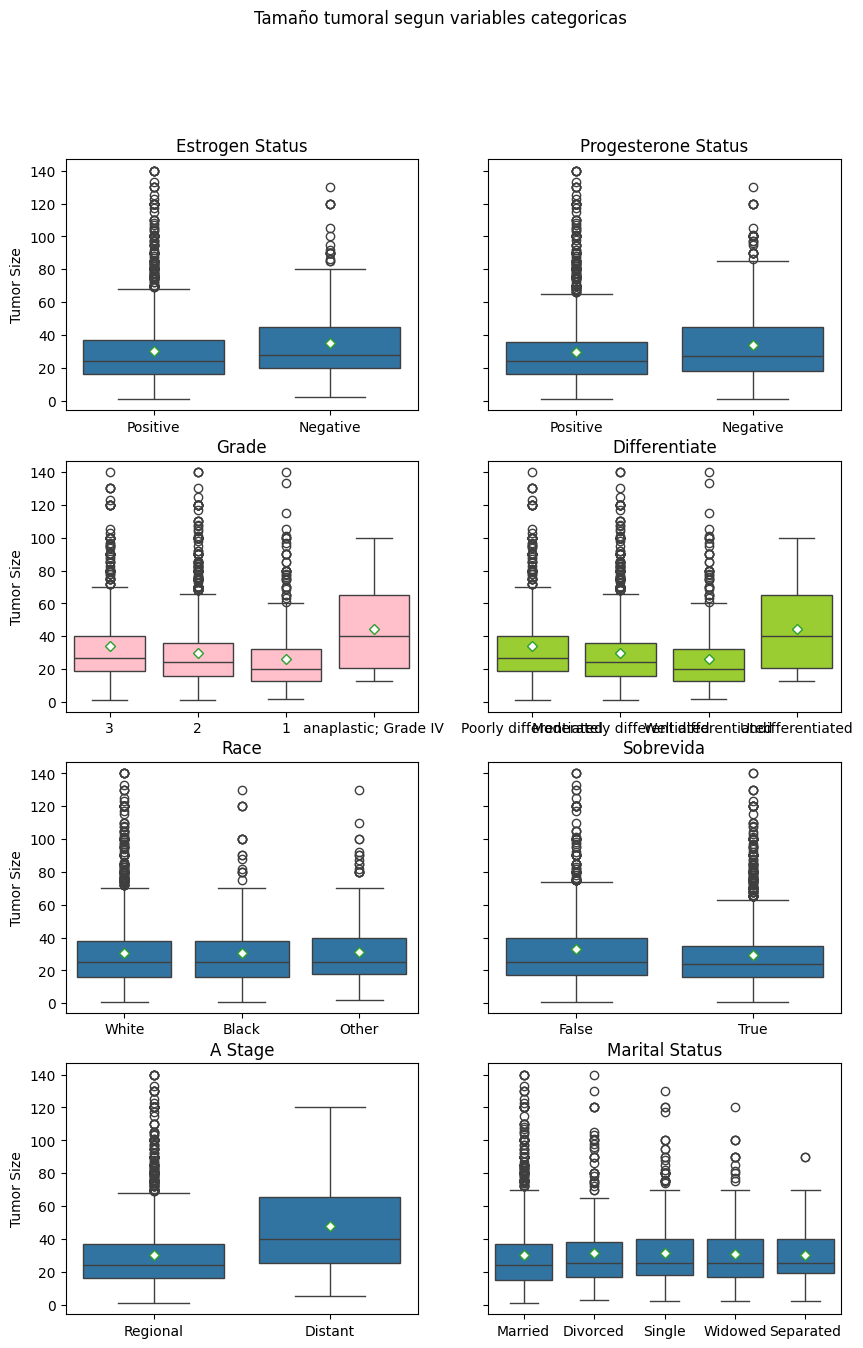

In [ ]:
# Boxplots seaborn Tumor Size por categorias

fig, axs = plt.subplots(4,2, figsize=(10,15), sharey=True)
es = sns.boxplot(df, y="Tumor Size", x="Estrogen Status", ax=axs[0,0],showmeans=True,
            meanprops={"marker": "D",
                       "markerfacecolor": "white",
                       "markersize": "5"}).set(title="Estrogen Status", xlabel=None)
ps = sns.boxplot(df, y="Tumor Size", x="Progesterone Status", ax=axs[0,1],showmeans=True,
            meanprops={"marker": "D",
                       "markerfacecolor": "white",
                       "markersize": "5"}).set(title="Progesterone Status", xlabel=None)
g = sns.boxplot(df, y="Tumor Size", x="Grade", ax=axs[1,0],showmeans=True,
                boxprops={"facecolor":"pink"},
            meanprops={"marker": "D",
                       "markerfacecolor": "white",
                       "markersize": "5"}).set(title="Grade", xlabel=None)
#g.get_xticks(labelsize=5.5)
d = sns.boxplot(df, y="Tumor Size", x="Differentiate",  ax=axs[1,1],showmeans=True,
                boxprops={"facecolor":"yellowgreen"},
            meanprops={"marker": "D",
                       "markerfacecolor": "white",
                       "markersize": "5"}).set(title="Differentiate", xlabel=None)
#d.set_xticklabels(df['Differentiate'].unique(), fontsize=8 )
r = sns.boxplot(df, y="Tumor Size", x="Race",  ax=axs[2,0],showmeans=True,
            meanprops={"marker": "D",
                       "markerfacecolor": "white",
                       "markersize": "5"}).set(title="Race", xlabel=None)
sv =sns.boxplot(df, y="Tumor Size", x="Sobrevida", ax=axs[2,1],showmeans=True,
            meanprops={"marker": "D",
                       "markerfacecolor": "white",
                       "markersize": "5"}).set(title="Sobrevida", xlabel=None)
As =sns.boxplot(df, y="Tumor Size", x="A Stage", ax=axs[3,0],showmeans=True,
            meanprops={"marker": "D",
                       "markerfacecolor": "white",
                       "markersize": "5"}).set(title="A Stage", xlabel=None)
ms =sns.boxplot(df, y="Tumor Size", x="Marital Status", ax=axs[3,1],showmeans=True,
           meanprops={"marker": "D",
                      "markerfacecolor": "white",
                       "markersize": "5"}).set(title="Marital Status", xlabel=None)
fig.suptitle("Tamaño tumoral segun variables categoricas")
fig.tight_layout

# no pude cambiar el tamaño de los labelticks y se me superponen los textos

'\n De cada sub grafico anterior se puede ver como el tamaño tumoral se comporta con respecto a cada categoria:\n\n- Estrogen y Progesterone Status: en ambos se ve una media un poquito mayor en los negativos y estos tiene menos outliers que los positivos\n\n- Differentiate y Grade: en estas dos variables, se ve la media de tamaño tumoral mayor en el el estadio mas desfavorable y mas pequeños en los menos desfavorables. Tambien se observa que los menos favorables (Undifferentiated y Grade IV Anaplasic) no se les marca outliers\n\n- Race: no parece haber diferencia en la media. Se puede ver que hay mas registros de raza blanca.\n\n- Sobrevida: parece haber mayores tamaños tumorales en aquellos que no vivieron mas de 60 meses\n'

 De cada sub grafico anterior se puede ver como el tamaño tumoral se comporta con respecto a cada categoria:

<br>

- Estrogen y Progesterone Status: en ambos se ve una media un poquito mayor en los negativos y estos tiene menos outliers que los positivos

<br>

- Differentiate y Grade: en estas dos variables, se ve una media del tamaño tumoral más grande en aquellos estadios más desfavorable, y más pequeños en los menos desfavorables. Tambien se observa que los menos favorables (Undifferentiated y Grade IV Anaplasic) no se les marcan outliers.

<br>

- Race: no parece haber diferencia en la media. Se puede ver que hay mas registros de raza blanca. ¿Acaso un sesgo de eleccion de pacientes?

<br>

- Sobrevida: parece haber mayores tamaños tumorales en aquellos con "Sobrevida" False: que no vivieron mas de 60 meses tras su diagnostico.

<br>

- A Stage: se ven tamaños tumorales mayores para los registros con A Stage Distant (paciente con enfermedad a distancia) y menores para A Stage Regional.

<br>

- Marital Status: no parece haber diferencias en la media del tamaño de tumor segun estado civil.


Text(0, 0.5, 'Tamaño (mm)')

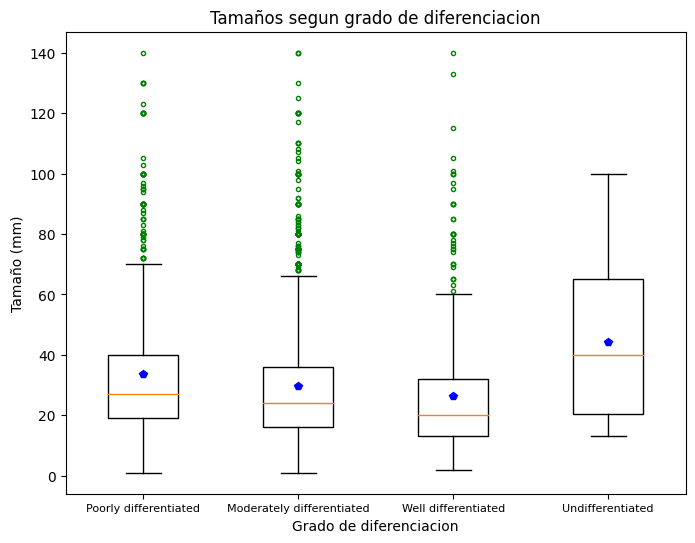

In [ ]:
# BOXPLOT de tamaño segun grado de diferenciacion

grouped_data = [df[df['Differentiate'] == categoria]['Tumor Size']
                for categoria in df['Differentiate'].unique()]

fig, ax = plt.subplots(figsize=(8, 6))
ax.boxplot(grouped_data, labels=df['Differentiate'].unique(),
           patch_artist=True,
           showmeans=True, #triangulito verde la media muestral de cada categoria
           meanprops = dict(marker='p', markeredgecolor='blue',markerfacecolor='blue'),
                      flierprops=dict(marker='o',
                           markersize=3,
                           linestyle='',
                           markeredgecolor='g'),
           boxprops = dict(facecolor="white"))
ax.set_xticklabels(df['Differentiate'].unique(), fontsize=8)
ax.set_title('Tamaños segun grado de diferenciacion')
ax.set_xlabel('Grado de diferenciacion')
ax.set_ylabel('Tamaño (mm)')


# DISCLAIMEER QUIERO hacer este grafico pero que  tome las variables categoricas ordenadas segun gravedad.

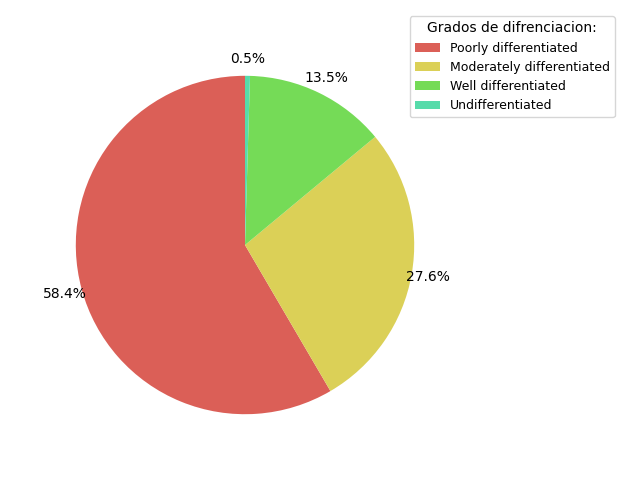

In [ ]:
# PIE CHART de grados de differenciacion

serie_estatus = df["Differentiate"].value_counts()
serie_estatus
categorias = df["Differentiate"].unique()

fig,ax = plt.subplots(figsize =(8,5))
fig.set_facecolor('w')
ax.pie(serie_estatus, radius=0.90, startangle=90, explode=[0,0,0,0], autopct= "%1.1f%%", pctdistance = 1.1, colors=sns.color_palette("hls",7))
plt.legend(categorias,  bbox_to_anchor =(1.30,1), loc='upper right',  fontsize=9, title= "Grados de difrenciacion:")
plt.tight_layout()
plt.show()


En este grafico de torta se ve a simple vista como la mayoria (mas de la mitad) de los tumores registrados eran pobremente diferneciados, seguidos por moderados, pobremente diferenciados, y en muchiisimo menor medida los indiferenciados.

## Nodulo Regionales Examinados y Positivos

Una vez diagnosticado el cancer de mama, se estudian los ganglios regionales para ver si contienen celulas cancerosas, lo cual me habla de diseminacion del tumor por via linfatica.

<br>

Analizando estas dos variables interpretamos que los nodulos positivos estan contenidos dentro de los examinados por definicion.
Calculamos la suma total de Nodulos Regionales Examinados (RNE) en todo el dataset y el total de Nodulos Regionales Positivos (RNP). Interpreto que los resultados son adecuados ya que los Positivos son menos que los examinados.

<br>

Ademas calculamos una tasa de positividad general para la relacion entre estos RNP/RNE, que nos dio un 29%. Para no entrar en estadistica, con este dato solo puedo decir que casi el 30% de los nodulos linfaticos examinados en el total de mi muestra fueron positivos.

<br>


Futuras lineas de analisis serian investigar esta tasa para las distintas variables categoricas: Sobrevida, Differentiate, A Stage, 6th Stage, Estrogen Status, Progesterone Status, etc.

In [ ]:
RNE = df["Regional Node Examined"].sum()
RNP = df["Regional Node Positive"].sum()
print("Nodulos Regionales Examinados totales: ", RNE)
print("Nodulos Regionales Positivos totales: ", RNP)
print("--------")
print("Tasa de positividad: ", ((RNP)/(RNE)*100).round(1),"%" )

Nodulos Regionales Examinados totales:  57773
Nodulos Regionales Positivos totales:  16732
--------
Tasa de positividad:  29.0 %


AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xticklabel'

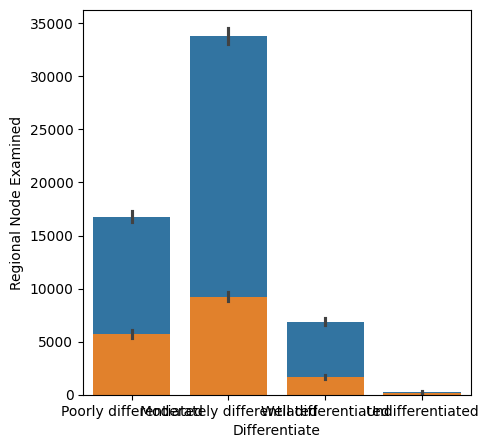

In [ ]:
# "Differentiate"
fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(data=df, x="Differentiate", y="Regional Node Examined", estimator=np.sum)
sns.barplot(data=df, x="Differentiate", y="Regional Node Positive", estimator=np.sum)


En una aproximacion a ver como se comporta la positividad de los nodulos linfaticos segun el grado de diferenciacion, en este grafico se muestra como para los indiferenciados, los positivos (naranjas) representan aproximadamente la mitad de los examinados) y para las otras categorias una proporcion menor.

In [ ]:
RNEsvT = df[(df["Sobrevida"]==True)]["Regional Node Examined"].sum()
RNEsvF = df[(df["Sobrevida"]==False)]["Regional Node Examined"].sum()
RNPsvT = df[(df["Sobrevida"]==True)]["Regional Node Positive"].sum()
RNPsvF = df[(df["Sobrevida"]==False)]["Regional Node Positive"].sum()

print("Suma total de RNE en sobrivientes de 5 años: ", RNEsvT)
print("Suma total de RNE en NO sobrivientes de 5 años: ", RNEsvF)
print("Suma total de RNP en  sobrivientes de 5 años: ",RNPsvT)
print("Suma total de RNP en NO sobrivientes de 5 años: ",RNPsvF)
print("Tasa de positividad en sobrevivientes de 5 años: ", ((RNPsvT)/(RNEsvT)*100).round(1),"%")
print("Tasa de positividad en NO sobrevivientes de 5 años: ", ((RNPsvF)/(RNEsvF)*100).round(1),"%")



Suma total de RNE en sobrivientes de 5 años:  40255
Suma total de RNE en NO sobrivientes de 5 años:  17518
Suma total de RNP en  sobrivientes de 5 años:  10776
Suma total de RNP en NO sobrivientes de 5 años:  5956
Tasa de positividad en sobrevivientes de 5 años:  26.8 %
Tasa de positividad en NO sobrevivientes de 5 años:  34.0 %


Para la variable sobrevida (binaria) calcule las sumatorias y tasas de positividad.

<br>

Se ve como los que sobrevivieron mas de 5 años tienen una tasa menora la total y en cambio los que no llegaron a sobrevivir 5 años del diagnostico tuvieron una tasa de positividad mayor a la general

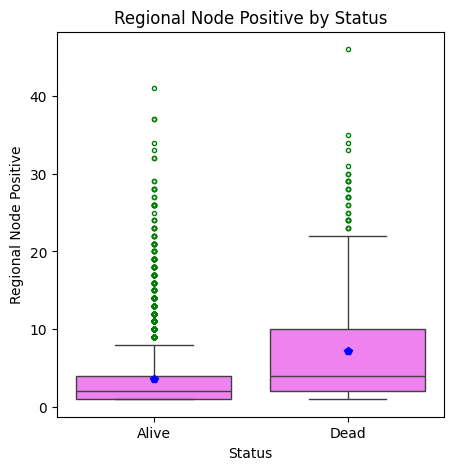

'\nPareciera que los pacientes que fallecieron tenian mas ganglios positivos que los que tienen los pacientes aun vivos.\n\nPero, disclaimer, la cantidad de ganglios es una variable cuantitativa discreta,\npor lo que usare la moda y\n\nhare barplots o displots o histograma para ver la distribucion de las cantidades para cada estado: dead o alive\n\n#\n'

In [ ]:
# Boxplot comparando Regional Node Positive segun Status:Alive/Dead
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(data=df, y="Regional Node Positive", x="Status",
           patch_artist=True,
           showmeans=True, #triangulito verde la media muestral de cada categoria
           meanprops = dict(marker='p', markeredgecolor='blue',markerfacecolor='blue'),
                      flierprops=dict(marker='o',
                           markersize=3,
                           linestyle='',
                           markeredgecolor='g'),
           boxprops = dict(facecolor="violet")).set_title('Regional Node Positive by Status')

plt.show()

df[(df["Status"]=="Alive")].decribe(include=object)

En este boxplot de RNP segun State, pareciera que los pacientes con Status Dead tenian más ganglios positivos que los que tienen los pacientes Status Alive.

Pero, disclaimer, la cantidad de ganglios es una variable cuantitativa discreta,
por lo que usare la moda y

hare barplots o displots o histograma para ver la distribucion de las cantidades para cada estado: dead o alive.

In [ ]:
print("ALIVE", df[(df["Status"]=="Alive")].describe(include=object))
print("ALIVE", df[(df["Status"]=="Alive")].describe())
print("----------------------------------------------")
print("DEAD", df[(df["Status"]=="Dead")].describe(include=object))
print("DEAD", df[(df["Status"]=="Dead")].describe())

ALIVE          Race Marital Status T Stage N Stage 6th Stage  \
count    3408           3408    3408    3408      3408   
unique      3              5       4       3         5   
top     White        Married      T2      N1       IIA   
freq     2903           2285    1483    2462      1209   

                    Differentiate Grade   A Stage Estrogen Status  \
count                        3408  3408      3408            3408   
unique                          4     4         2               2   
top     Moderately differentiated     2  Regional        Positive   
freq                         2046  2046      3351            3247   

       Progesterone Status Status  
count                 3408   3408  
unique                   2      1  
top               Positive  Alive  
freq                  2914   3408  
ALIVE                Age   Tumor Size  Regional Node Examined  \
count  3408.000000  3408.000000             3408.000000   
mean     53.759096    29.268779               14.2373

In [ ]:
print("ALIVE", df[(df["Status"]=="Alive")]["Regional Node Positive"].describe(include=object))
print("ALIVE", df[(df["Status"]=="Alive")]["Regional Node Positive"].describe())
print("----------------------------------------------")
print("DEAD", df[(df["Status"]=="Dead")]["Regional Node Positive"].describe(include=object))
print("DEAD", df[(df["Status"]=="Dead")]["Regional Node Positive"].describe())



ALIVE count    3408.000000
mean        3.600646
std         4.375180
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        41.000000
Name: Regional Node Positive, dtype: float64
ALIVE count    3408.000000
mean        3.600646
std         4.375180
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        41.000000
Name: Regional Node Positive, dtype: float64
----------------------------------------------
DEAD count    616.000000
mean       7.241883
std        7.312642
min        1.000000
25%        2.000000
50%        4.000000
75%       10.000000
max       46.000000
Name: Regional Node Positive, dtype: float64
DEAD count    616.000000
mean       7.241883
std        7.312642
min        1.000000
25%        2.000000
50%        4.000000
75%       10.000000
max       46.000000
Name: Regional Node Positive, dtype: float64


Text(0, 0.5, 'Nodulos Regionales Positivos')

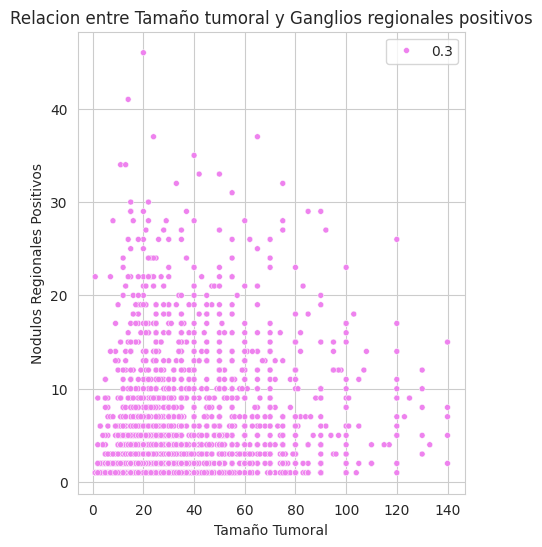

In [ ]:
# Scatterplot con sns de Nodulos regionales positivos y tamaño tumoral

sns.set_style('whitegrid')
plt.figure(figsize=(5,6))
sns.scatterplot(x=df["Tumor Size"], y=df["Regional Node Positive"], marker='o', color="violet", size=0.3)
plt.title('Relacion entre Tamaño tumoral y Ganglios regionales positivos')
plt.xlabel('Tamaño Tumoral')
plt.ylabel('Nodulos Regionales Positivos')

De este scatterplot de RNP segun Tumor Size no saco muchas conclusiones ya que veo casos de muchos RNP en tamaños tumorales grandes. A su vez veo una condensacion de observaciones hacia tamaños tumorales de alrededor de 20 a 40mm.

[Text(0.5, 1.0, 'RNP SV - por Status'),
 Text(0, 0.5, 'Regional Node Positive'),
 Text(0.5, 0, 'Survival Months')]

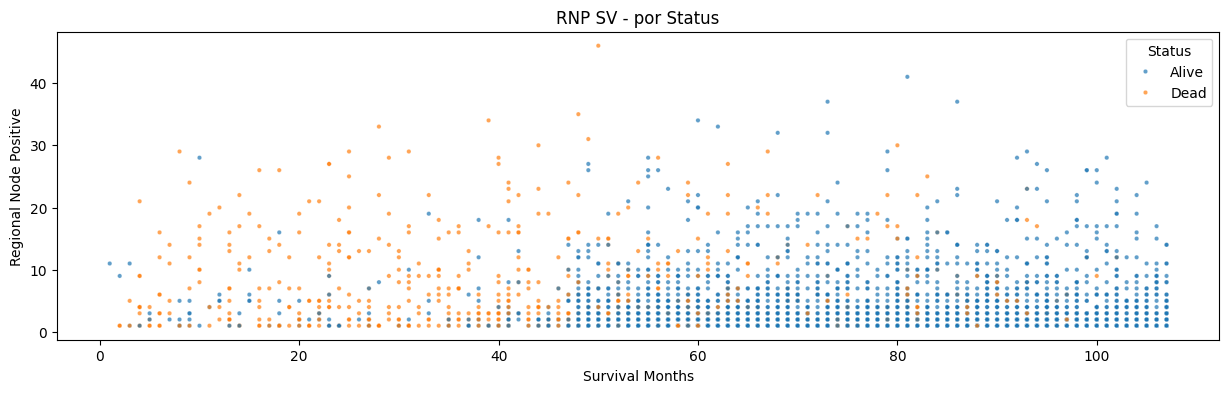

In [ ]:
# Scatterplot de ganglios positivo y meses de supervivencia separado por si estan vivo o muertos

plt.subplots(figsize=(15, 4))
sns.scatterplot(data=df,
                x="Survival Months",
                y="Regional Node Positive",
                hue="Status", s=10, alpha=0.7).set(title="RNP SV - por Status",
                                                ylabel="Regional Node Positive",
                                                xlabel="Survival Months")

# En este grafico solo podria concluir que se ve mas densidad de vivos con sobrevida mayora a 44 meses, y de los fallecidos parecen haber vivido menos de 44 meses.
# Suena a un sesgo el la eleccion de participantes de la base

[Text(0.5, 1.0, 'RNP TS - por Status'),
 Text(0, 0.5, 'Regional Node Positive'),
 Text(0.5, 0, 'Tumor Size')]

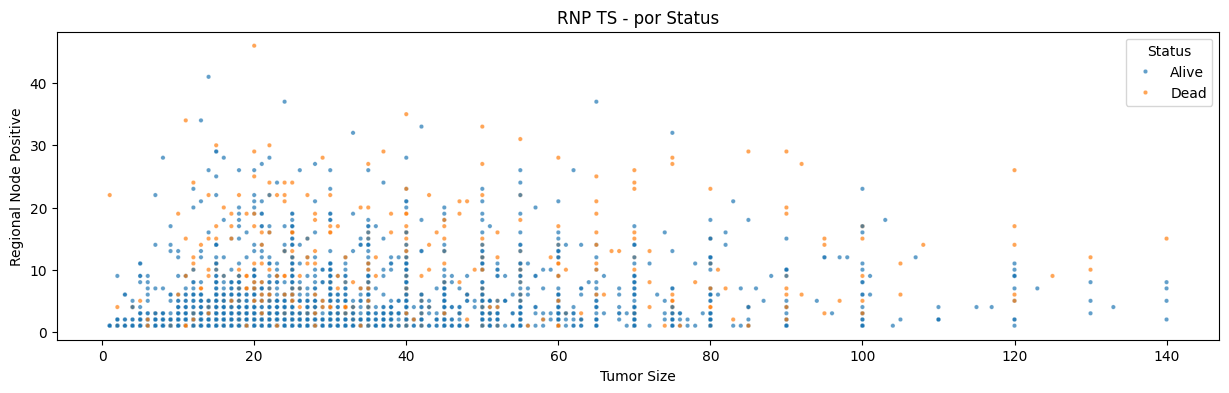

In [ ]:
# Scatterplot de ganglios positivo y meses de supervivencia separado por tamaño de tumor
plt.subplots(figsize=(15, 4))
sns.scatterplot(data=df,
                x="Tumor Size",
                y="Regional Node Positive",
                hue="Status", s=10, alpha=0.7).set(title="RNP TS - por Status",
                                                ylabel="Regional Node Positive",
                                                xlabel="Tumor Size")

In [ ]:
# ver de estos scatter hacerlos linea con displot, ? la linea de media con el aurea

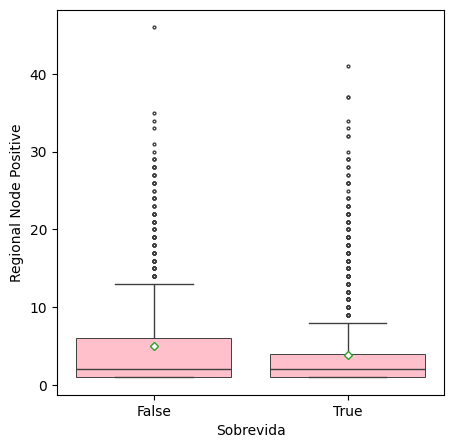

In [ ]:
#Boxplot disclimer de nodulos positivos ( cuantitativa discreta) segun si vivio mas de 60 meses o no.

fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(df, y="Regional Node Positive", x="Sobrevida",showmeans=True,
            boxprops = dict(linewidth=0.7, facecolor='pink'),
            flierprops={"markersize":"2"},
            meanprops={"marker": "D",
                       "markerfacecolor": "white",
                       "markersize": "4"}).set(title="")
fig.show()

# en este boxplot de cantidad de nodulos regionales positivos segun sobrevida, pareciera que los que no sobrevivieron mas de 60 meses tenias myor cantidad de nodulos regionales positivos

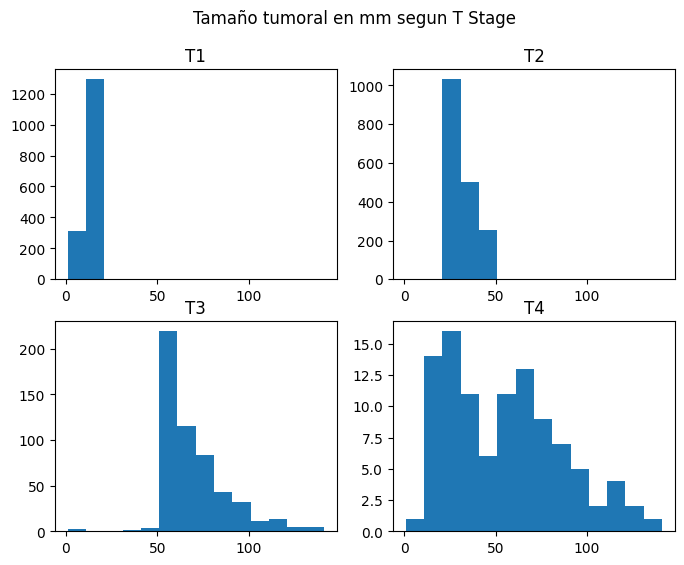

' En este subplot de histogramas se ve como cada categoria tiene sus tamaños de inicio,\nT1 hasta 20mm (2cm), T2 entre 20 y 50 mm, T3 mas de 50mm y T4 cualquier tamaño, pero infiltra otros tejidos\n'

## Receptores hormonales: Estrogen Status y Progesterone Status

Como influyen en los meses de sobrevida.

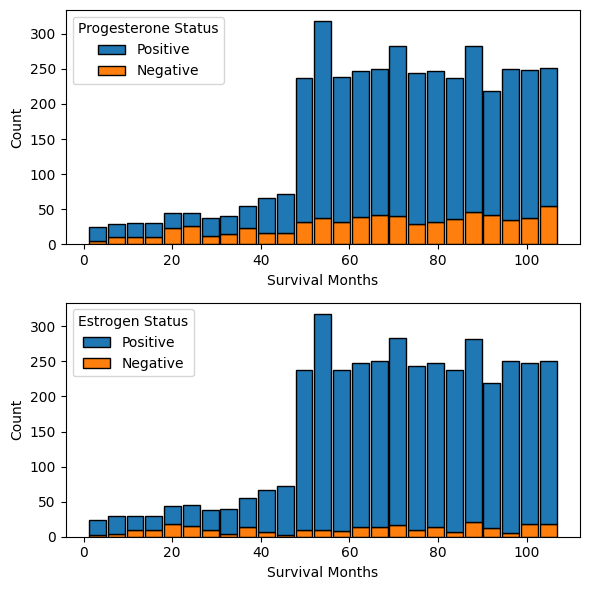

'\n3y4) Barras de meses de supervivencia categorizado segun Progesteron o Estrogen Status:\n  - para ambos indicadores, se ve que aumenta la proporcion de positivos que sobreviven mas meses.\n  Aqui quedaria para indagar el fenotipo triple negativo, pero la base carece del dato de receptores HER.\n  Tener marcadores hormonales propensos tratamiento quizas sea la razon de que prevalezca la positidad en meses de supervivencia mayores.\n  O se tomo una muestra de pacientes heterogenea desdede los que vivieron mas de 44 meses, donde auenta la cantidad que sobrevivieron\n\n'

In [ ]:
# Tira de graficos
f, axs = plt.subplots(2,1, figsize=(6,6))

sns.histplot(data=df, x="Survival Months", hue="Progesterone Status", multiple="stack", shrink=.9, alpha=1, legend=True, ax=axs[0])
sns.histplot(data=df, x="Survival Months", hue="Estrogen Status", multiple="stack", shrink=.9, alpha=1, legend=True, ax=axs[1])

f.tight_layout()
plt.show()


Para ambos marcadores hormonales se ve que aumenta la proporción de positivos que sobreviven mayor cantidad de meses.
<br>
Lineas futuras a seguir con respectoa estos marcdores seria hacer una tabla de doble entrada para determinar cuantos registros hay con ambos marcadores tumorales positivos, cuantos con solo estrogenos, solo progestagenos y cuantos sin ninguno de los dos.

Estos marcadores hormonales, son clave para el tratamiento ya que existen drogas especificas antitumorales dirigidos hacia los mismos.

En una vision mas macro de estos dos graficos podemos ver como la cantidad de pacientes que sobreviven mas meses auemnta a partir de los 44 meses. A qué se puede deber este hallazgo? Podrá ser un sesgo en la seleccion de pacientes?


# Coeficientes de correlacion

El coeficiente de correlacion me dice si entre dos variables numericas hay relacion o no.
 Si el coeficiente esta cerca de cero (ya se positivo o negativo), las variables no se correlacionan.
 En cambio, cuanto más se acerque a 1 o -1, mas fuerte es la correlacion.

In [ ]:
# Valores de correlacion con Numpy : ninguno parece correlacionar mucho...

print(np.corrcoef(df["Tumor Size"], df["Regional Node Positive"])) #0.24
print(np.corrcoef(df["Regional Node Examined"], df["Regional Node Positive"])) #0.41
print(np.corrcoef(df["Tumor Size"], df["Survival Months"])) # -0.08
print(np.corrcoef(df["Age"], df["Survival Months"])) #-0,009
print(np.corrcoef(df["Tumor Size"], df["Age"])) #-0,07
print(np.corrcoef(df["Regional Node Examined"], df["Tumor Size"])) #0.1


[[1.         0.24232172]
 [0.24232172 1.        ]]
[[1.        0.4115797]
 [0.4115797 1.       ]]
[[ 1.         -0.08690124]
 [-0.08690124  1.        ]]
[[ 1.         -0.00938956]
 [-0.00938956  1.        ]]
[[ 1.         -0.07721497]
 [-0.07721497  1.        ]]
[[1.        0.1043518]
 [0.1043518 1.       ]]


Text(0.5, 1.0, 'Coeficientes de correlacion de variables cuantitativas')

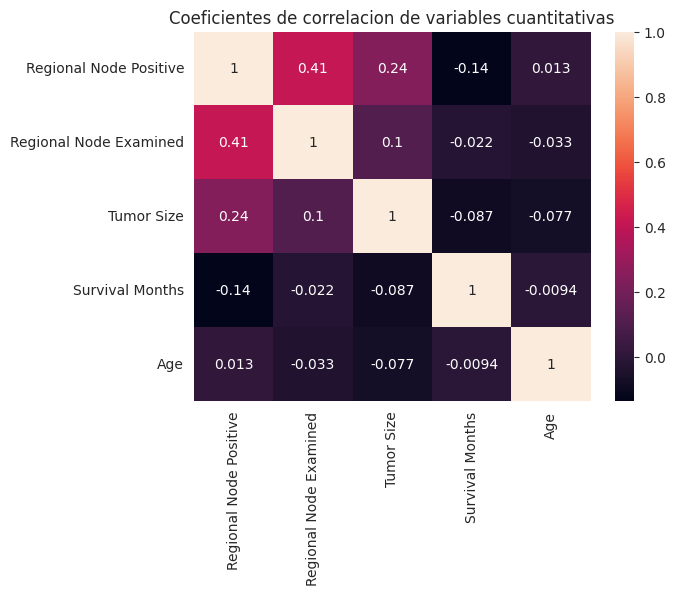

In [ ]:
# Graficos HEATMAP de correlacion con SNS

#Correlacion Regional Nodes Examined vs Positive
columnas_seleccionadas = df[["Regional Node Positive", "Regional Node Examined", "Tumor Size", "Survival Months", "Age"]]

# Calcular la matriz de correlación
matriz_correlacion = columnas_seleccionadas.corr()

# Crear una visualización de la matriz de correlación utilizando seaborn
sns.heatmap(matriz_correlacion, annot=True).set_title("Coeficientes de correlacion de variables cuantitativas")

A partir de esta matriz, no pareciera haber correlacion entre mis variables cuantitativas. La relacion que mayor coeficiente me da es la de Regional Nodes Positive con Regional Nodes Examined... donde ya por definicion se podria pensar que los Positivos estan incluidos en los examinados, por lo que no son variables independientes.